<div style="text-align: center">
<br>

# Performance Evaluation of Terapixel Rendering

</div>

<div style="text-align: center">

January 21, 2021

</div>

<br>

Table of Content
1. Abstract
2. Introduction
3. Motivation/Business Understanding
4. Objective
5. Tools & Methodologies
6. Data Description
<br>
    6.1 Loading Dataset<br>
    6.2 GPU Dataset<br>
    6.3 Application Checkpoint Dataset<br>
    6.4 Task Dataset<br>
7. Data Preprocessing<br>
8. Exploratory Data Analysis

<br>

***

<br>

## 1. Abstract

<div style="text-align: justify">
With the increasing use of cloud technologies, there is a need to find more information to enhance efficiency and further reduce cost and power. This can be done through performance evaluation using data analysis.
This project aims to extract information from the dataset created from the application checkpoint and system metric output from a production of a terapixel image to pinpoint the area on which optimization should be focused.
</div>

## 2. Introduction

<div style="text-align: justify">
Terapixel images offer an intuitive, accessible way to present information sets to stakeholders, allowing viewers to interactively browse big data across multiple scales. The terapixel image is an image that contains over 1 trillion pixels which is overwhelming in size and difficult to render [1] on a local machine, however, if deployed on cloud, it can aid authorities from various domain from Healthcare to national security as the rendering is done over cloud and hence is not restricted to hardware resources.

Through the data provided by the Newcastle University we take on the challenge of highlighting and developing the understanding of the data and possible ways to improve the performance of the nodes through exploratory data analysis.
The report presents a data understanding by using the CRISP DM cycle. Through this methodology insights about the data are collected and used to form hypothesis for later analysis, doing this repeatedly in order (some flexibility possible [2]) with the aim for modelling/deployment to stakeholders. In this report it would invlove freq. analysing, merging data, cleaning data, and finding patterns of GPU erformance though different process.

<br>

[1] Wang, C.-W., Huang, C.-T., Hung, C.-M., 2015. VirtualMicroscopy: ultra-fast interactive microscopy of gigapixel/terapixel images over internet. Scientific reports 5, 14069.

[2] Chapman, P., Clinton, J., Kerber, R., Khabaza, T., Reinartz, T., Shearer, C., Wirth, R., 2000.
CRISP-DM 1.0 Step-by-step data mining guide.
</div>

## 3. Motivation/Business Understanding 

<div style="text-align: justify">
Cloud computing with IoT has gained a lot of popularity in recent years since it continues to provide unprecedented possibilities; yet, it comes with a significant cost aspect known as "Cloud Economics." If the workload in the cloud is not properly optimised, the total cost of ownership (TCO) will rise, resulting in worse returns on investment. As a result, analysing performance measurements from cloud supercomputers becomes critical in order to properly calibrate the process.

Despite the fact that this initiative is unrelated to any business or organisation, it must have a positive influence on stakeholders' concerns that have not been addressed previously in its area.
</div>

## 4. Objective

The goal of this report is to investigate bottlenecks and trends in the use of GPUs for terapixel rendering operations of Newcastle Upon Tyne over a cloud computing platform. Following are the expected criterias to be explored on.

- Parallel workload distribution by the cloud architecture.
- Memory Usage
- Event type runtime pattern and domination.
- Relationship between gpu statistics.

[1] Micikevicius, Paulius. "GPU performance analysis and optimization." In GPU technology conference, vol. 3. 2012.
[2] Bradley, Thomas. "GPU performance analysis and optimisation." NVIDIA Corporation (2012).
[3] Yamaoka, S., Doerr, K.-U., Kuester, F., 2011. Visualization of high-resolution image collections on large tiled display walls. Future Generation Computer Systems 27, 498–505.

## 5. Tools & Methodologies

<div style="text-align: justify">
Flexibility is possible [1] in CRISP-DM and using it the data preparation will be carried out before exploration, and understanding. Their will be no modelling and deploymet steps since no modelling will occur in this project but it can be regarded in future works.<br>

**Rationale**
- Cleaning the datasets - Removal of unwanted observtion (duplicate or irrelevant data) to prepare the data for exploration.
- Merging - Preparing of the integrated data set by aggregating required fields.
- EDA -  Finding insights about data structure, data relationships or data patterns.

**Tools**

Use of python programming language is done and to promote reproducibility jupyter notebook is used with proper instructions in readme to produce the report. This ensures everything is in one place with good shareability.

GitHub is used for version control to safe guard/minimise from the risks of accidental or mistaken changes ensuring that sevral developmental routes can be controlled easily without worrying of not being able to revert back when modifications are scrapped.

[1] Chapman, P., Clinton, J., Kerber, R., Khabaza, T., Reinartz, T., Shearer, C., Wirth, R., 2000.
CRISP-DM 1.0 Step-by-step data mining guide.
</div>

In [2]:
# Install the below mentioned libraries before running this notebook
# Use [pip install "package name"]
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## 6. Data Description

<div style="text-align: justify">
The datasets provided are based on the results from a run of three 3 jobs (levels 4, 8 and 12 of the terapixel image) using 1024 GPU nodes over the public cloud, recording timings of the rendering, GPU performance, and which image details are being rendering. 

This data is divided into three separated datasets stored in .csv files:

- gpu.csv: GPU status metrics (temperatures, memory usage, etc.).
- application-checkpoints.csv: checkpoint events throughout render job saved by the application.
- task-x-y.csv: Co-ordinates of image parts being rendered in tasks carried by the application
for the job.
</div>

<div style="text-align: justify">

**Data Features**

- timestamp (textual): Timestamp for tuple in ’YYYY-MM-DD H:M:S.f’ format for start and end of event.
- gpuSerial (nuerical): Serial number assigned to physical gpu card.
- hostname (textual): Unique system ID assigned to the Machine GPU runs from by Microsoft Azure.
- gpuUUID (textual): Unique GPU ID assigned to the Machine GPU runs from by Microsoft Azure.
- powerDrawWatt (numerical): Average power draw of system (Watts) for event.
- gpuTempC (numerical): The Average GPU temperature (Celsius) for event.
- gpuUtilPerc (numerical): The average GPU utilisation % (0-100) for event.
- gpuMemUtilPerc (numerical): The average GPU memory usage % (0-100) for event.
- eventName (textual): Name of current event occurring in the rendering process.

    Possible values
    
        - TotalRender: The whole task itself
        - Render: Image tile being rendered
        - Saving Config: Configuration overhead
        - Tiling: Tile postprocessing
        - Uploading: Output uploading to Azure Blob Storage
    <br>
- eventType (textual): Possible values - 'Start' & 'Stop' - Signifies starting and stopping of the event/process.
- jobId (textual) - ID of the Azure batch job.
- taskId (textual) - ID of the Azure batch task.      
- x (numerical): X coordinate of tile being rendered
- y (numerical): Y coordinate of tile being rendered
- level (numerical): Visualisation level (zoom) within the terapixel map (4, 8, 12)
</div>

#### 6.1 Loading Datasets

In [3]:
df_gpu = pd.read_csv("C:/Users/Acer/OneDrive - Newcastle University/Newcastle/Cloud Computing/data/gpu.csv")

In [4]:
df_app = pd.read_csv("C:/Users/Acer/OneDrive - Newcastle University/Newcastle/Cloud Computing/data/application-checkpoints.csv")

In [5]:
df_task = pd.read_csv("C:/Users/Acer/OneDrive - Newcastle University/Newcastle/Cloud Computing/data/task-x-y.csv")

#### 6.2 GPU Dataset

In [6]:
# Printing first few lines
df_gpu.head()

timestamp                                hostname  \
0  2018-11-08T08:27:10.314Z  8b6a0eebc87b4cb2b0539e81075191b900001C   
1  2018-11-08T08:27:10.192Z  d8241877cd994572b46c861e5d144c85000000   
2  2018-11-08T08:27:10.842Z  db871cd77a544e13bc791a64a0c8ed50000006   
3  2018-11-08T08:27:10.424Z  b9a1fa7ae2f74eb68f25f607980f97d7000010   
4  2018-11-08T08:27:10.937Z  db871cd77a544e13bc791a64a0c8ed50000003   

      gpuSerial                                   gpuUUID  powerDrawWatt  \
0  323217055910  GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534         131.55   
1  323617020295  GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f         117.03   
2  323217056562  GPU-f4597939-a0b4-e78a-2436-12dbab9a350f         121.64   
3  325217085931  GPU-ad773c69-c386-a4be-b214-1ea4fc6045df          50.23   
4  323217056464  GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2         141.82   

   gpuTempC  gpuUtilPerc  gpuMemUtilPerc  
0        48           92              53  
1        40           92              48  
2        45           91              44  
3        38           90              43  
4        41           90              47

In [7]:
# Checking diemnsions of data 
df_gpu.shape

(1543681, 8)

In [8]:
# Finding duplicates acoss all columns
duplicateRows = df_gpu[df_gpu.duplicated()]

In [9]:
# Dropping duplicate rows
df_gpu = df_gpu.drop_duplicates(keep=False)
df_gpu.shape

(1543663, 8)

In [10]:
duplicateRows = df_gpu[df_gpu.duplicated(['gpuUUID'])]

In [11]:
df_gpu_test = df_gpu.drop_duplicates(subset=['gpuUUID'])
df_gpu_test.shape

(1024, 8)

#### 6.3 Application Checkpoint Dataset

In [12]:
# Printing first few lines
df_app.head()

timestamp                                hostname  \
0  2018-11-08T07:41:55.921Z  0d56a730076643d585f77e00d2d8521a00000N   
1  2018-11-08T07:42:29.842Z  0d56a730076643d585f77e00d2d8521a00000N   
2  2018-11-08T07:42:29.845Z  0d56a730076643d585f77e00d2d8521a00000N   
3  2018-11-08T07:42:29.845Z  0d56a730076643d585f77e00d2d8521a00000N   
4  2018-11-08T07:43:13.957Z  0d56a730076643d585f77e00d2d8521a00000N   

       eventName eventType                                            jobId  \
0         Tiling      STOP  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
1  Saving Config     START  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
2  Saving Config      STOP  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
3         Render     START  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
4    TotalRender      STOP  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   

                                 taskId  
0  b47f0263-ba1c-48a7-8d29-4bf021b72043  
1  20fb9fcf-a927-4a4b-a64c-70258b66b42d  
2  20fb9fcf-a927-4a4b-a64c-70258b66b42d  
3  20fb9fcf-a927-4a4b-a64c-70258b66b42d  
4  20fb9fcf-a927-4a4b-a64c-70258b66b42d

In [13]:
# Checking diemnsions of data 
df_app.shape

(660400, 6)

#### 6.4 Test Dataset

In [14]:
# Printing first few lines
df_task.head()

taskId  \
0  00004e77-304c-4fbd-88a1-1346ef947567   
1  0002afb5-d05e-4da9-bd53-7b6dc19ea6d4   
2  0003c380-4db9-49fb-8e1c-6f8ae466ad85   
3  000993b6-fc88-489d-a4ca-0a44fd800bd3   
4  000b158b-0ba3-4dca-bf5b-1b3bd5c28207   

                                             jobId    x    y  level  
0  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  116  178     12  
1  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  142  190     12  
2  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  142   86     12  
3  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  235   11     12  
4  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705  171   53     12

In [15]:
# Checking diemnsions of data
df_task.shape

(65793, 5)

## 7. Data Preprocessing

This section concentrated on the process of data cleaning and wrangling along with merging datasets.
Here we create function to convert timestamp  to our format and we use merge_check_task function to merge application-checkpoints dataset and task dataset using left join on taskId and jobId.

In [16]:
TIMESTAMP_FORMAT = '%Y-%m-%dT%H:%M:%S.%fZ'
def timestamp_conv(df):
    """
    Converts a timestamp to datetime
    
    Parameters
    ----------
    df
        dataframe to convert to datetime
    ----------
    float
        converted timestamp
    """
    
    df = df.apply(lambda x: (datetime.strptime(x, TIMESTAMP_FORMAT)))    
    return(df)

In [17]:
def merge_check_task(df_checkpoints, df_tasks):
    
    """"
    Merging application check point and task (left join) taskId and jobId
    
    Parameters
    ----------
    check_task_df
        application checkpoints and tasks megred dataframe to merge with gpu df
    
    gpu_df
        gpu dataframe to merge
    """
    
    df_check_task = df_checkpoints.merge(df_tasks,
                                     on=['taskId', 'jobId'], how='left')
    return (df_check_task)
df_check_task = merge_check_task(df_app, df_task)

In [18]:
# Converting timestamp for gpu data

df_gpu['timestamp'] = timestamp_conv(df_gpu['timestamp'])
df_gpu

timestamp                                hostname  \
0       2018-11-08 08:27:10.314  8b6a0eebc87b4cb2b0539e81075191b900001C   
1       2018-11-08 08:27:10.192  d8241877cd994572b46c861e5d144c85000000   
2       2018-11-08 08:27:10.842  db871cd77a544e13bc791a64a0c8ed50000006   
3       2018-11-08 08:27:10.424  b9a1fa7ae2f74eb68f25f607980f97d7000010   
4       2018-11-08 08:27:10.937  db871cd77a544e13bc791a64a0c8ed50000003   
...                         ...                                     ...   
1543676 2018-11-08 08:31:18.873  0d56a730076643d585f77e00d2d8521a00000N   
1543677 2018-11-08 08:31:24.933  0d56a730076643d585f77e00d2d8521a00000N   
1543678 2018-11-08 08:31:32.998  0d56a730076643d585f77e00d2d8521a00000N   
1543679 2018-11-08 08:31:39.057  0d56a730076643d585f77e00d2d8521a00000N   
1543680 2018-11-08 08:31:45.108  0d56a730076643d585f77e00d2d8521a00000N   

            gpuSerial                                   gpuUUID  \
0        323217055910  GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534   
1        323617020295  GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f   
2        323217056562  GPU-f4597939-a0b4-e78a-2436-12dbab9a350f   
3        325217085931  GPU-ad773c69-c386-a4be-b214-1ea4fc6045df   
4        323217056464  GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2   
...               ...                                       ...   
1543676  325217086221  GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f   
1543677  325217086221  GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f   
1543678  325217086221  GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f   
1543679  325217086221  GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f   
1543680  325217086221  GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f   

         powerDrawWatt  gpuTempC  gpuUtilPerc  gpuMemUtilPerc  
0               131.55        48           92              53  
1               117.03        40           92              48  
2               121.64        45           91              44  
3                50.23        38           90              43  
4               141.82        41           90              47  
...                ...       ...          ...             ...  
1543676          26.99        30            0               0  
1543677          26.90        29            0               0  
1543678          26.88        29            0               0  
1543679          26.89        29            0               0  
1543680          26.89        29            0               0  

[1543663 rows x 8 columns]

In [19]:
# Converting timestamp for merged data (appl. check and task)
df_check_task['timestamp'] = timestamp_conv(df_check_task['timestamp'])
df_check_task

timestamp                                hostname  \
0      2018-11-08 07:41:55.921  0d56a730076643d585f77e00d2d8521a00000N   
1      2018-11-08 07:42:29.842  0d56a730076643d585f77e00d2d8521a00000N   
2      2018-11-08 07:42:29.845  0d56a730076643d585f77e00d2d8521a00000N   
3      2018-11-08 07:42:29.845  0d56a730076643d585f77e00d2d8521a00000N   
4      2018-11-08 07:43:13.957  0d56a730076643d585f77e00d2d8521a00000N   
...                        ...                                     ...   
660395 2018-11-08 08:30:10.296  0745914f4de046078517041d70b22fe700000I   
660396 2018-11-08 08:30:10.325  0745914f4de046078517041d70b22fe700000I   
660397 2018-11-08 08:30:14.081  a77ef58b13ad4c01b769dac8409af3f800000H   
660398 2018-11-08 08:30:14.127  a77ef58b13ad4c01b769dac8409af3f800000H   
660399 2018-11-08 08:30:12.159  0d56a730076643d585f77e00d2d8521a000009   

            eventName eventType  \
0              Tiling      STOP   
1       Saving Config     START   
2       Saving Config      STOP   
3              Render     START   
4         TotalRender      STOP   
...               ...       ...   
660395         Tiling      STOP   
660396      Uploading      STOP   
660397         Tiling      STOP   
660398    TotalRender      STOP   
660399      Uploading      STOP   

                                                  jobId  \
0       1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
1       1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
2       1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
3       1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
4       1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
...                                                 ...   
660395  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
660396  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
660397  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
660398  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
660399  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   

                                      taskId    x    y  level  
0       b47f0263-ba1c-48a7-8d29-4bf021b72043    2   10     12  
1       20fb9fcf-a927-4a4b-a64c-70258b66b42d  238    4     12  
2       20fb9fcf-a927-4a4b-a64c-70258b66b42d  238    4     12  
3       20fb9fcf-a927-4a4b-a64c-70258b66b42d  238    4     12  
4       20fb9fcf-a927-4a4b-a64c-70258b66b42d  238    4     12  
...                                      ...  ...  ...    ...  
660395  8261c0ff-03d6-48b3-a50f-da41cb3291fd   33  217     12  
660396  8261c0ff-03d6-48b3-a50f-da41cb3291fd   33  217     12  
660397  ce97e3e9-494a-43a7-aa85-edd2db4cf099   85  103     12  
660398  ce97e3e9-494a-43a7-aa85-edd2db4cf099   85  103     12  
660399  bbf4ff73-c754-4111-95cd-a339c87a2b17  186  228     12  

[660400 rows x 9 columns]

After converting the timestamp for gpu and the merged data (df_check_task), both are merged through inner join based on timestamp using the below function. The merged data has 337682 rows and 16 columns with no null values.


In [20]:
def final_merge_gpu(gpu_data,  merge_1):


    # Merging gpu and application checkpoints data (inner join) based on timestamp and hostname

    merge_gpu_app = gpu_data.merge(merge_1,on=['timestamp'], how='inner')
    return (merge_gpu_app)
df_final = final_merge_gpu(df_gpu, df_check_task)


In [86]:
df_final

timestamp                              hostname_x  \
0      2018-11-08 08:27:10.875  4a79b6d2616049edbf06c6aa58ab426a000008   
1      2018-11-08 08:27:10.875  4a79b6d2616049edbf06c6aa58ab426a000008   
2      2018-11-08 08:27:10.624  b9a1fa7ae2f74eb68f25f607980f97d700000B   
3      2018-11-08 08:27:10.624  b9a1fa7ae2f74eb68f25f607980f97d700000B   
4      2018-11-08 08:27:10.359  4c72fae95b9147189a0559269a6953ff00000X   
...                        ...                                     ...   
337677 2018-11-08 08:24:23.967  0d56a730076643d585f77e00d2d8521a00000N   
337678 2018-11-08 08:27:49.025  0d56a730076643d585f77e00d2d8521a00000N   
337679 2018-11-08 08:27:49.025  0d56a730076643d585f77e00d2d8521a00000N   
337680 2018-11-08 08:29:58.159  0d56a730076643d585f77e00d2d8521a00000N   
337681 2018-11-08 08:29:58.159  0d56a730076643d585f77e00d2d8521a00000N   

           gpuSerial                                   gpuUUID  powerDrawWatt  \
0       325017019905  GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0          77.87   
1       325017019905  GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0          77.87   
2       324917052053  GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a          88.47   
3       324917052053  GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a          88.47   
4       325117063055  GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3         146.32   
...              ...                                       ...            ...   
337677  325217086221  GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f         124.28   
337678  325217086221  GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f          43.15   
337679  325217086221  GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f          43.15   
337680  325217086221  GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f          27.27   
337681  325217086221  GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f          27.27   

        gpuTempC  gpuUtilPerc  gpuMemUtilPerc  \
0             36           90              40   
1             36           90              40   
2             40           91              48   
3             40           91              48   
4             43           93              52   
...          ...          ...             ...   
337677        39           89              45   
337678        38            0               0   
337679        38            0               0   
337680        32            0               0   
337681        32            0               0   

                                    hostname_y      eventName eventType  \
0       265232c5f6814768aeefa66a7bec6ff6000010         Render      STOP   
1       265232c5f6814768aeefa66a7bec6ff6000010      Uploading     START   
2       04dc4e9647154250beeee51b866b0715000014  Saving Config      STOP   
3       04dc4e9647154250beeee51b866b0715000014         Render     START   
4       6139a35676de44d6b61ec247f0ed8657000009         Render      STOP   
...                                        ...            ...       ...   
337677  6139a35676de44d6b61ec247f0ed8657000017  Saving Config     START   
337678  5903af3699134795af7eafc605ae5fc700000X         Render      STOP   
337679  5903af3699134795af7eafc605ae5fc700000X      Uploading     START   
337680  4a79b6d2616049edbf06c6aa58ab426a00000X         Render      STOP   
337681  4a79b6d2616049edbf06c6aa58ab426a00000X      Uploading     START   

                                                  jobId  \
0       1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
1       1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
2       1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
3       1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
4       1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
...                                                 ...   
337677  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
337678  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
337679  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
337680  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
337681  1024-lvl12-7

In [22]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337682 entries, 0 to 337681
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       337682 non-null  datetime64[ns]
 1   hostname_x      337682 non-null  object        
 2   gpuSerial       337682 non-null  int64         
 3   gpuUUID         337682 non-null  object        
 4   powerDrawWatt   337682 non-null  float64       
 5   gpuTempC        337682 non-null  int64         
 6   gpuUtilPerc     337682 non-null  int64         
 7   gpuMemUtilPerc  337682 non-null  int64         
 8   hostname_y      337682 non-null  object        
 9   eventName       337682 non-null  object        
 10  eventType       337682 non-null  object        
 11  jobId           337682 non-null  object        
 12  taskId          337682 non-null  object        
 13  x               337682 non-null  int64         
 14  y               337682 non-null  int

In [85]:
df_final.describe()

gpuSerial  powerDrawWatt       gpuTempC    gpuUtilPerc  \
count  3.376820e+05  337682.000000  337682.000000  337682.000000   
mean   3.239882e+11      91.627871      40.421953      65.418432   
std    1.222477e+09      38.628722       3.454082      40.363495   
min    3.201181e+11      22.770000      26.000000       0.000000   
25%    3.236170e+11      47.390000      38.000000       0.000000   
50%    3.236170e+11      98.370000      40.000000      90.000000   
75%    3.250170e+11     122.510000      42.000000      92.000000   
max    3.252171e+11     195.830000      55.000000     100.000000   

       gpuMemUtilPerc              x              y          level  
count   337682.000000  337682.000000  337682.000000  337682.000000  
mean        34.701530     127.150266     126.716588      11.984092  
std         22.488164      74.098367      73.989423       0.252882  
min          0.000000       0.000000       0.000000       4.000000  
25%          0.000000      63.000000      63.000000      12.000000  
50%         44.000000     127.000000     127.000000      12.000000  
75%         51.000000     191.000000     191.000000      12.000000  
max         83.000000     255.000000     255.000000      12.000000

To find the duration of the each process we further divide the data on the basis of the event type i.e., Start time and Stop time seperately then merge the data back using eventName, x, y, and level. Now simply subtract the starting time from stopping time to find the duration.

In [129]:
# Displaying total iterations based on event type
df_final['eventType'].value_counts()

START    169386
STOP     168296
Name: eventType, dtype: int64

In [42]:
# Record start and stop times in seperate columns

df_start = df_final[
df_final['eventType'] == 'START']
df_stop = df_final[
df_final['eventType'] == 'STOP']

df_start.rename(
        index=str, columns={"timestamp": "start_time"}, inplace = True)
df_stop.rename(
        index=str, columns={"timestamp": "stop_time"}, inplace = True)

df_stop.drop('eventType', axis = 1, inplace = True)
df_start.drop('eventType', axis = 1, inplace = True)
   
# Make each field record start and stop combined
   
df = pd.merge( df_start, df_stop, 
            on=['eventName', 'x', 'y', 'level'])


# Finding the duration
df['duration'] = df['stop_time'] - df['start_time']
df

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


start_time                            hostname_x_x  \
0     2018-11-08 08:27:10.875  4a79b6d2616049edbf06c6aa58ab426a000008   
1     2018-11-08 08:27:10.624  b9a1fa7ae2f74eb68f25f607980f97d700000B   
2     2018-11-08 08:27:10.359  4c72fae95b9147189a0559269a6953ff00000X   
3     2018-11-08 08:27:10.359  4c72fae95b9147189a0559269a6953ff00000X   
4     2018-11-08 08:27:10.678  83ea61ac1ef54f27a3bf7bd0f41ecaa700000T   
...                       ...                                     ...   
86622 2018-11-08 08:05:49.714  0d56a730076643d585f77e00d2d8521a00000N   
86623 2018-11-08 08:05:49.714  0d56a730076643d585f77e00d2d8521a00000N   
86624 2018-11-08 08:18:00.161  0d56a730076643d585f77e00d2d8521a00000N   
86625 2018-11-08 08:24:23.967  0d56a730076643d585f77e00d2d8521a00000N   
86626 2018-11-08 08:24:23.967  0d56a730076643d585f77e00d2d8521a00000N   

        gpuSerial_x                                 gpuUUID_x  \
0      325017019905  GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0   
1      324917052053  GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a   
2      325117063055  GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3   
3      325117063055  GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3   
4      323617021291  GPU-fa23937e-9287-a4f8-f648-3787bfa31054   
...             ...                                       ...   
86622  325217086221  GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f   
86623  325217086221  GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f   
86624  325217086221  GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f   
86625  325217086221  GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f   
86626  325217086221  GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f   

       powerDrawWatt_x  gpuTempC_x  gpuUtilPerc_x  gpuMemUtilPerc_x  \
0                77.87          36             90                40   
1                88.47          40             91                48   
2               146.32          43             93                52   
3               146.32          43             93                52   
4                71.59          41             89                42   
...                ...         ...            ...               ...   
86622            97.68          41             91                57   
86623            97.68          41             91                57   
86624            70.32          37             81                29   
86625           124.28          39             89                45   
86626           124.28          39             89                45   

                                 hostname_y_x      eventName  ...  \
0      265232c5f6814768aeefa66a7bec6ff6000010      Uploading  ...   
1      04dc4e9647154250beeee51b866b0715000014         Render  ...   
2      6139a35676de44d6b61ec247f0ed8657000009      Uploading  ...   
3      6139a35676de44d6b61ec247f0ed8657000009      Uploading  ...   
4      6139a35676de44d6b61ec247f0ed865700001D         Render  ...   
...                                       ...            ...  ...   
86622  04dc4e9647154250beeee51b866b0715000014    TotalRender  ...   
86623  6139a35676de44d6b61ec247f0ed865700001A         Render  ...   
86624  265232c5f6814768aeefa66a7bec6ff600000U         Tiling  ...   
86625  6139a35676de44d6b61ec247f0ed8657000017  Saving Config  ...   
86626  6139a35676de44d6b61ec247f0ed8657000017  Saving Config  ...   

        gpuSerial_y                                 gpuUUID_y  \
0      324917052614  GPU-bc05182a-0194-740f-827e-851d9ae28136   
1      325117172543  GPU-159afbfa-9b2e-ec8c-aff4-a920bd54b8ba   
2      323617020155  GPU-51b7ec74-a5ac-06b7-1fd0-9c11ce579ffc   
3      325117172395  GPU-50f23433-71f3-6f16-3c86-0de884dc7493   
4      323617043161  GPU-82ba6a59-510a-9995-4167-0945785066b3   
...             ...                                       ...   
86622  323617020277  GPU-636b97cd-9ff5-cbf0-9b18-e462e3b8a6fb   
86623  324917053014  GPU-fd95a940-581a-15ac-2e82-96c00f9e1a9a   
86624  325217086360  GPU-13ba9276-da7a-8225-3302-c800e4c8ff07   
86625  323617043182  GPU-78df

## 8. Exploratory Data Analysis

This section focuses on exploring the data for interesting patterns and insights.

Below total duration for each event is mentioned.
From the table we can clearly see, that GPUs overwhelmingly work on rendering most of their time with saving config occuring negligibly.

In [87]:
# group by event name (except total) to find total execution times for each event
event_deltas = df[df['eventName'] != 'TotalRender'].groupby(
['eventName']).apply(lambda x: x.stop_time - x.start_time)
x = pd.DataFrame(event_deltas)
x.groupby(['eventName']).sum()

0
eventName                           
Render        8 days 03:15:30.505000
Saving Config 0 days 00:00:43.138000
Tiling        0 days 04:38:47.443000
Uploading     0 days 06:38:47.232000

>
plt.bar(df['eventName'], df['duration'].groupby(['eventName']).sum())<br>
plt.ylabel('Time')<br>
plt.xlabel('Event name')


In [45]:
# Storing gpu temp and power as x and y variable for plotting
x = df_gpu.gpuTempC
y = df_gpu.powerDrawWatt

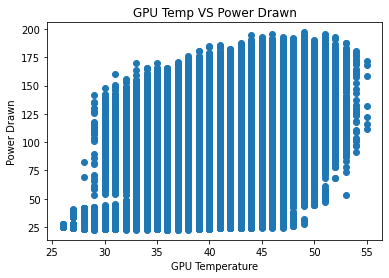

In [46]:
# Plotting scatter plot
plt.scatter(x,y)
plt.xlabel('GPU Temperature')
plt.ylabel('Power Drawn')
plt.title('GPU Temp VS Power Drawn')

# Defining chart size
plt.rcParams['figure.figsize'] = [10, 6]

# Saving Image
# plt.savefig('Images/temp-power.png')
plt.show()

In [47]:
# Storing gpu memory utility % and utility % as x and y variable for plotting
x = df_gpu.gpuMemUtilPerc
y = df_gpu.gpuUtilPerc

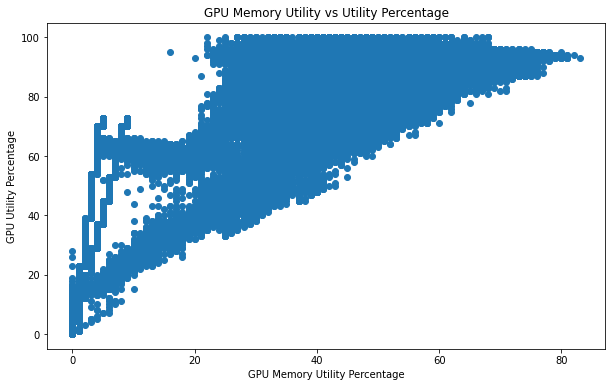

In [48]:
# Plotting scatter plot
plt.scatter(x,y)
plt.xlabel('GPU Memory Utility Percentage')
plt.ylabel('GPU Utility Percentage')
plt.title('GPU Memory Utility vs Utility Percentage')

# Defining chart size
plt.rcParams['figure.figsize'] = [10, 6]

# Saving Image
# plt.savefig('Images/mem-utility.png')
plt.show()

In [49]:
# Statistical Sumary of the data
df_gpu.describe()

gpuSerial  powerDrawWatt      gpuTempC   gpuUtilPerc  gpuMemUtilPerc
count  1.543663e+06   1.543663e+06  1.543663e+06  1.543663e+06    1.543663e+06
mean   3.239836e+11   8.919851e+01  4.007562e+01  6.305822e+01    3.341360e+01
std    1.228836e+09   3.975741e+01  3.800256e+00  4.144813e+01    2.300106e+01
min    3.201181e+11   2.255000e+01  2.600000e+01  0.000000e+00    0.000000e+00
25%    3.236170e+11   4.499000e+01  3.800000e+01  0.000000e+00    0.000000e+00
50%    3.236170e+11   9.659000e+01  4.000000e+01  8.900000e+01    4.300000e+01
75%    3.250170e+11   1.213400e+02  4.200000e+01  9.200000e+01    5.100000e+01
max    3.252171e+11   1.970100e+02  5.500000e+01  1.000000e+02    8.300000e+01

#### Plotting pair subplots to obtain relationship between variables. 

To get the relationship idea between the gpu statistics we plot the pair plot.

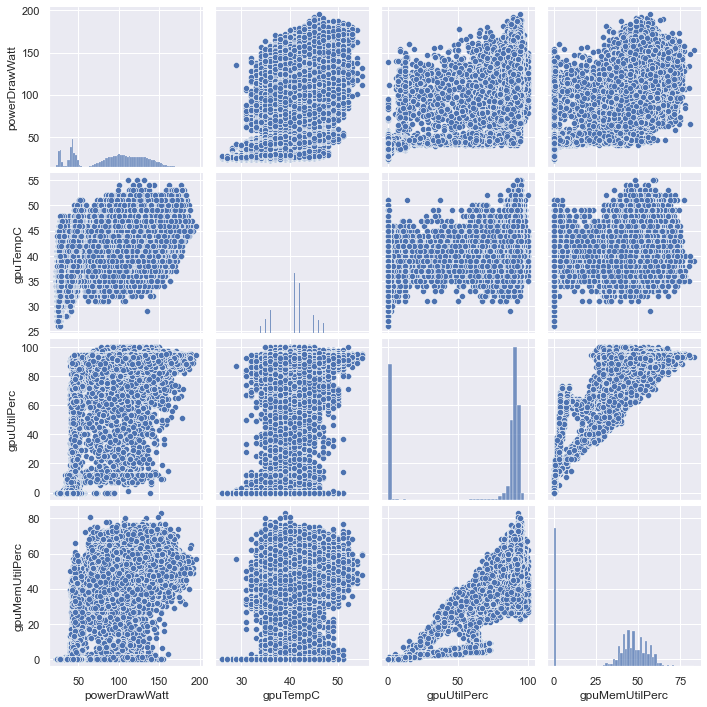

In [88]:
matrix_corr = df_final.iloc[:,4:8]
sns.pairplot(matrix_corr)

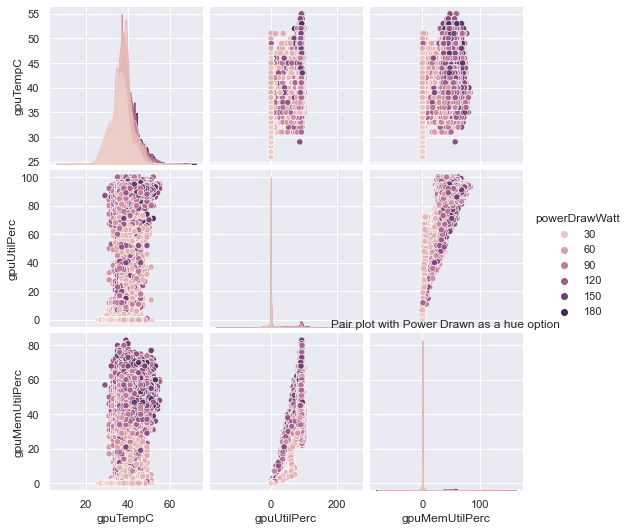

In [89]:
sns.pairplot(matrix_corr, hue ='powerDrawWatt')
plt.title("Pair plot with Power Drawn as a hue option")
plt.show()

To quantify the above plots we find out correlation matrix.
From the correlation data and heatmap we can observe that there exists a correlation between few variables.<br>
Correlation coefficient interpretation<br>
-    0 = No relationship between the variables
- +0.3 = weak relationship 
- +0.5 = moderate positive relationship 
- +0.7 = strong positive linear relationship 
-   +1 = perfect positive linear relationship

From the matrix we can observe that power drawn has strong positive linear relationship with gpu utility percentage and gpu memory utility percentage which means with the increas in power drawn more gpu utilization and memory utilization. It also has a moderate positive relationship with gpu temp.

GPU Temp has a weak relationship with memory utility which indicates there is no significant affect on gpu temp with increase or decrease of memory utility percentage.

In [50]:
# Seperating numerical columns needed to find correlation
gpu_corr = df_gpu.iloc[:,4:8]

# Finding correlation
gpu_corr.corr()

powerDrawWatt  gpuTempC  gpuUtilPerc  gpuMemUtilPerc
powerDrawWatt        1.000000  0.537190     0.862673        0.870746
gpuTempC             0.537190  1.000000     0.505906        0.492783
gpuUtilPerc          0.862673  0.505906     1.000000        0.966571
gpuMemUtilPerc       0.870746  0.492783     0.966571        1.000000

The above correlation coefficient matrix has been plotted as a heatmap thereby making it easier to visualize the relationship with respect to color intensity.

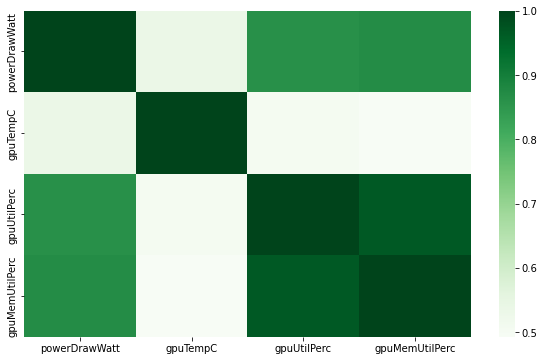

In [51]:
# Plotting Heat Map
plt.figure(figsize=(10, 6))
sns.heatmap(gpu_corr.corr(),cmap='Greens',annot=False)

# Saving Image
# plt.savefig('Images/Heat-map.png')
plt.show()

In [52]:
# Displaying total iterations based on event name
df_final['eventName'].value_counts()

TotalRender      67756
Saving Config    67682
Uploading        67642
Render           67328
Tiling           67274
Name: eventName, dtype: int64

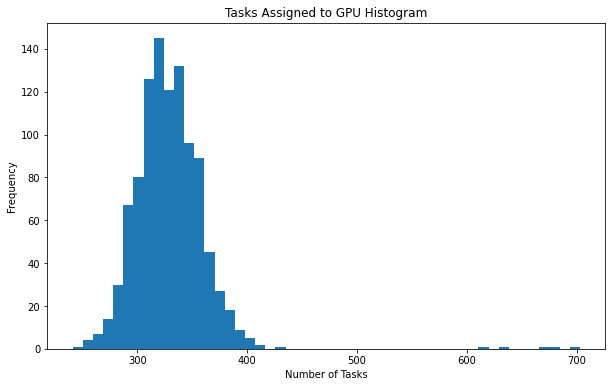

In [56]:
df_final['gpuUUID'].value_counts().plot(kind = 'hist', bins=50)
plt.xlabel('Number of Tasks')
plt.title('Tasks Assigned to GPU Histogram')
plt.rcParams['figure.figsize'] = [15, 8]
# plt.savefig('Images/tasks-histo.png') # save figure
plt.show()

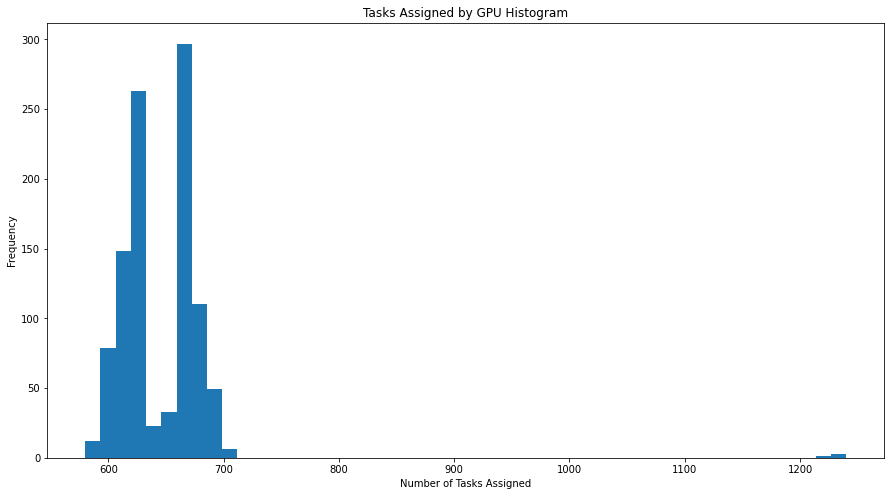

In [57]:
df_check_task['hostname'].value_counts().plot(kind = 'hist', bins=50)
plt.xlabel('Number of Tasks Assigned')
plt.title('Tasks Assigned by GPU Histogram')
plt.rcParams['figure.figsize'] = [15, 8]
# plt.savefig('/tasks-histo.png') # save figure
plt.show()

#### Analyzing GPU Hardware performance visually

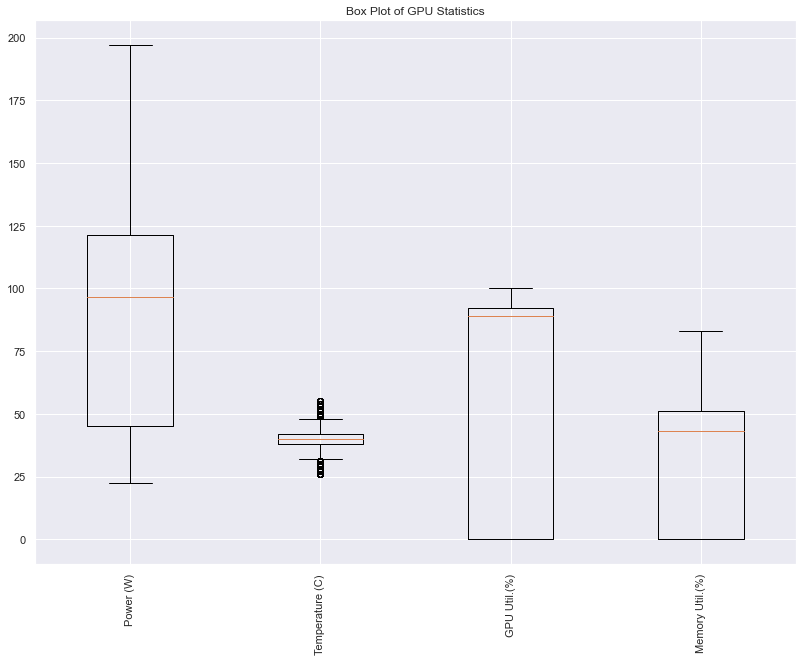

In [92]:
# List of gpu statical labels mentioned in the dataset
gpu_stats = ['Power (W)','Temperature (C)','GPU Util.(%)','Memory Util.(%)']

plt.subplot(1, 2, 1)
plt.boxplot([df_gpu['powerDrawWatt'], df_gpu['gpuTempC'],
df_gpu['gpuUtilPerc'], df_gpu['gpuMemUtilPerc']])

# Add labels
plt.xticks([i+1 for i, x in enumerate(gpu_stats)],
gpu_stats, rotation='vertical')

# Plot Title
plt.title('Box Plot of GPU Statistics')
plt.rcParams['figure.figsize'] = [30, 10]

# Saving Image
# plt.savefig('Images/Box-plot.png')
plt.show()


The above box plot of gpu statistics represents various gpu parameters captured during the image rendering.

**GPU Util %**

Since the average is around 85-90 % we can conclude that most gpu's are utilised to almost their full extent but due to large inter quartile range some improvements are still necessary for more efficient handling.

**Memory Utility %**

Here the average is around 50% with a smaller & tighter inter quartile range suggesting that either the rendering task is non memory intensive or the tasks are not well optimised to make use of the memory. It can also be considered that GPUs are of significant memory which is causing this wastage.

**GPU Power Drawn**

Power range is from 22.5W to 200W with range of 45 to 121W under normal circumstances. For a large scale application these metrics can assis engineers to optimize the power supply unit for efficient balance.
Also it can be observed that the GPU utilisation throughout the render runs seems to average right next to 90%, which is a good indication, since it shows that the computation resources are well allocated.

#### Plotting Histogram to visualize the power consumption range

In [93]:
# Setting size and plotting chart
plt.figure(figsize=(15,8)) 
sns.set()
sns.distplot(df_gpu['powerDrawWatt'], kde = False, color = 'midnightblue', label = "Age")

# Adding Labels and Title
plt.title("Power Consumption - GPU")
plt.xlabel('Power Drwasn (in Watts)')

# Saving Image
#plt.savefig('Images/Powerconsumption.png')

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Power Drwasn (in Watts)')

From the above histogram we can observe that most GPU clusters consume between 20 to 50W of power. The rest consume power in the form of normal distribution.

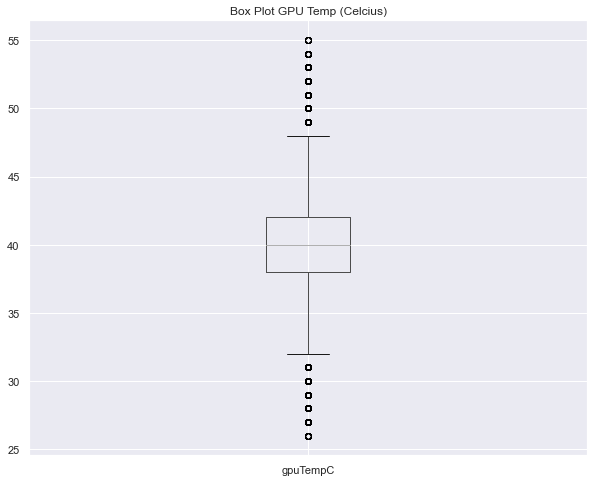

In [95]:
# Plotting box plot
#fig = plt.figure(figsize = (10,7))
df_gpu.boxplot(column = ["gpuTempC"])
plt.title('Box Plot GPU Temp (Celcius)')

# Defining chart size
plt.rcParams['figure.figsize'] = [20, 18]

# Saving Image
#plt.savefig('Images/Box-plot_gpu_temp.png')
plt.show()

**GPU Temp**

GPU temp is tightly knitted around 40 degree celcius but it does have a few outliers reaching a min of ~26 to a maximum of ~55 degree celcius. It shows excellent temperature management in gpu cluster

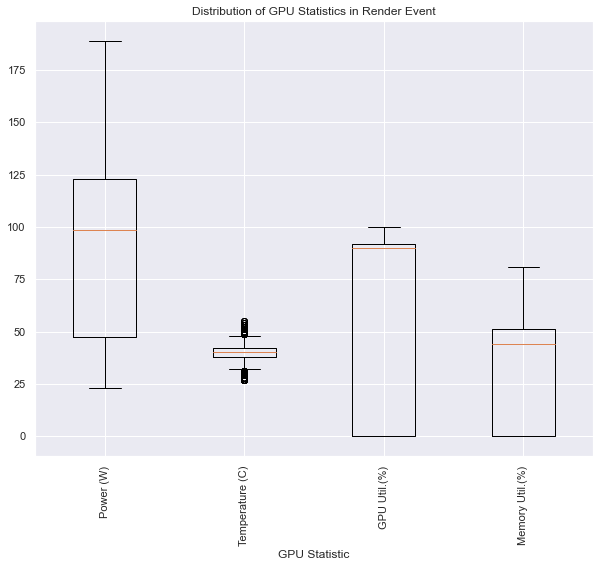

In [64]:
# group by 'render' event type
plt.boxplot(
[df_final[df_final['eventName'] == 'Render']['powerDrawWatt'],
df_final[df_final['eventName'] == 'Render']['gpuTempC'],
df_final[df_final['eventName'] == 'Render']['gpuUtilPerc'],
df_final[df_final['eventName'] == 'Render']['gpuMemUtilPerc']])
# setup labels and titles
plt.title('Distribution of GPU Statistics in Render Event')
plt.xlabel('GPU Statistic')
plt.xticks([i+1 for i, _ in enumerate(gpu_stats)],
gpu_stats, rotation='vertical')
# draw plot
plt.rcParams['figure.figsize'] = [20, 8]
plt.show()

We can see that box plot for event render type is almost same is the general box plot for the gpu statistics. This is because from our earlier research (Start of section 8) we know that render event type is the most significant process done with rest of them almost being insignificant. 

```
# group by statistic
plt.boxplot(
[df_final[df_final['eventName'] == 'Tiling']['powerDrawWatt'],
df_final[df_final['eventName'] == 'Tiling']['gpuTempC'],
df_final[df_final['eventName'] == 'Tiling']['gpuUtilPerc'],
df_final[df_final['eventName'] == 'Tiling']['gpuMemUtilPerc']])

# setup labels and titles
plt.title('Distribution of GPU Statistics in Tiling Event')
plt.xticks([i+1 for i, _ in enumerate(gpu_stats)],
gpu_stats, rotation='vertical')

# draw plot
plt.rcParams['figure.figsize'] = [18, 16]
plt.show()
```


```
# group by statistic
plt.boxplot([df_final[df_final['eventName'] == 'Uploading']['powerDrawWatt'],
df_final[df_final['eventName'] == 'Uploading']['gpuTempC'],
df_final[df_final['eventName'] == 'Uploading']['gpuUtilPerc'],
df_final[df_final['eventName'] == 'Uploading']['gpuMemUtilPerc']])

# setup labels and titles
plt.title('Distribution of GPU Statistics in Uploading Event')
plt.xticks([i+1 for i, _ in enumerate(gpu_stats)],
gpu_stats, rotation='vertical'r>

# draw plot
plt.rcParams['figure.figsize'] = [8, 6]
plt.show
```

In [128]:
# Displaying counts based on level
df_final['level'].value_counts()

12    336345
8       1331
4          6
Name: level, dtype: int64

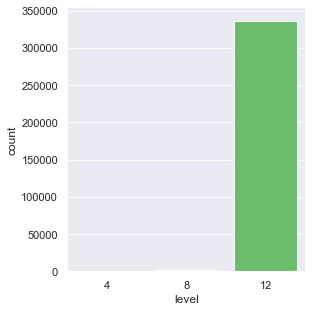

In [126]:
# Plotting level count 
sns.catplot(x='level',kind='count', data=df_final, height=4.5, palette='viridis')

Text(0.5, 1.0, 'Task Workload')

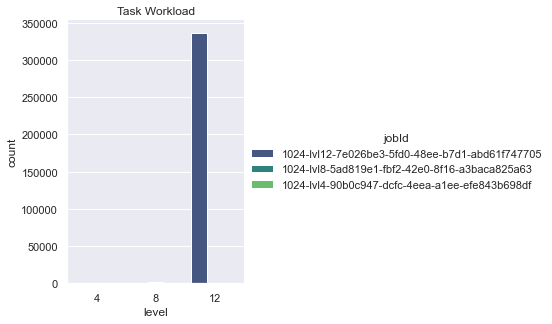

In [127]:
sns.catplot(x='level', kind='count', data=df_final, hue = "jobId", height=4.5, palette='viridis')
plt.title("Task Workload")

In [67]:
df_tskid = df_final.loc[df_final['jobId'] == "1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705"]
df_tskid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336345 entries, 0 to 337681
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       336345 non-null  datetime64[ns]
 1   hostname_x      336345 non-null  object        
 2   gpuSerial       336345 non-null  int64         
 3   gpuUUID         336345 non-null  object        
 4   powerDrawWatt   336345 non-null  float64       
 5   gpuTempC        336345 non-null  int64         
 6   gpuUtilPerc     336345 non-null  int64         
 7   gpuMemUtilPerc  336345 non-null  int64         
 8   hostname_y      336345 non-null  object        
 9   eventName       336345 non-null  object        
 10  eventType       336345 non-null  object        
 11  jobId           336345 non-null  object        
 12  taskId          336345 non-null  object        
 13  x               336345 non-null  int64         
 14  y               336345 non-null  int

Text(0.5, 1.0, 'GPU Utilization for selected task ID:0fea60cb-e10d-4879-a50d-9c20926f50af')

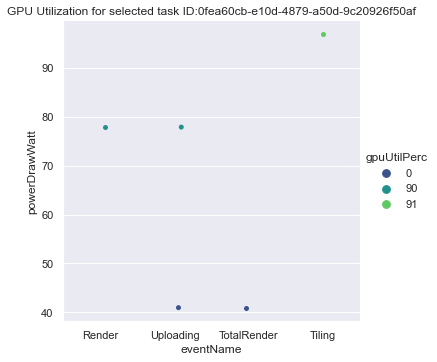

In [68]:
df_tskid = df_final.loc[df_final['taskId'] == "0fea60cb-e10d-4879-a50d-9c20926f50af"] # extracting dataframe for assigned task id 
sns.catplot(x='eventName', y = "powerDrawWatt", hue = "gpuUtilPerc", data = df_tskid, height=5, palette='viridis')
plt.title("GPU Utilization for selected task ID:0fea60cb-e10d-4879-a50d-9c20926f50af")

In [69]:
df_lvl4 = df_final.loc[df_final['level'] == 4] # slicing dataframe for only level 4 pixels. 

Text(0.5, 1.0, 'Level 4 GPU Utilization for selected task ID:f09afffd-17be-4ff2-b7a3-adef404472cc')

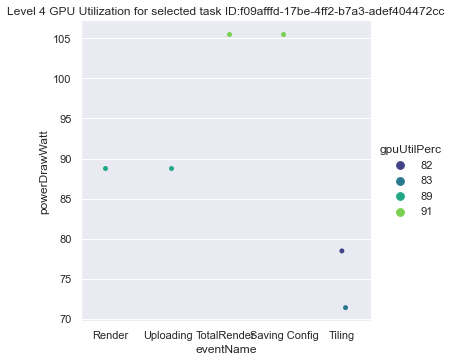

In [70]:
sns.catplot(x='eventName', y = "powerDrawWatt", hue = "gpuUtilPerc", data = df_lvl4, height = 5, palette='viridis')
plt.title("Level 4 GPU Utilization for selected task ID:f09afffd-17be-4ff2-b7a3-adef404472cc")

In [71]:
df_lvl8 = df_final.loc[df_final['level'] == 8] # slicing dataframe for only level 8 pixels. 

Text(0.5, 1.0, 'Level 8 GPU Utilization')

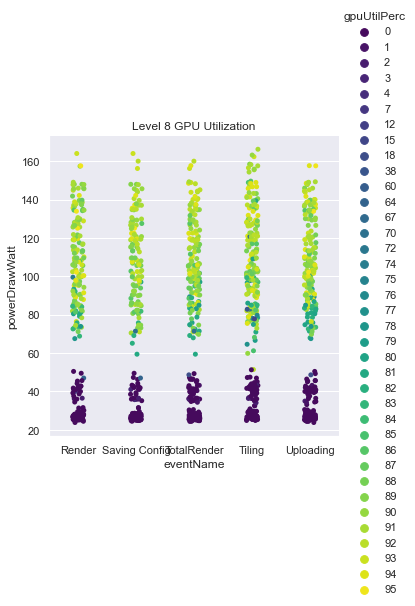

In [72]:
sns.catplot(x='eventName', y = "powerDrawWatt", hue = "gpuUtilPerc", data = df_lvl8, height = 5, palette='viridis')
plt.title("Level 8 GPU Utilization")

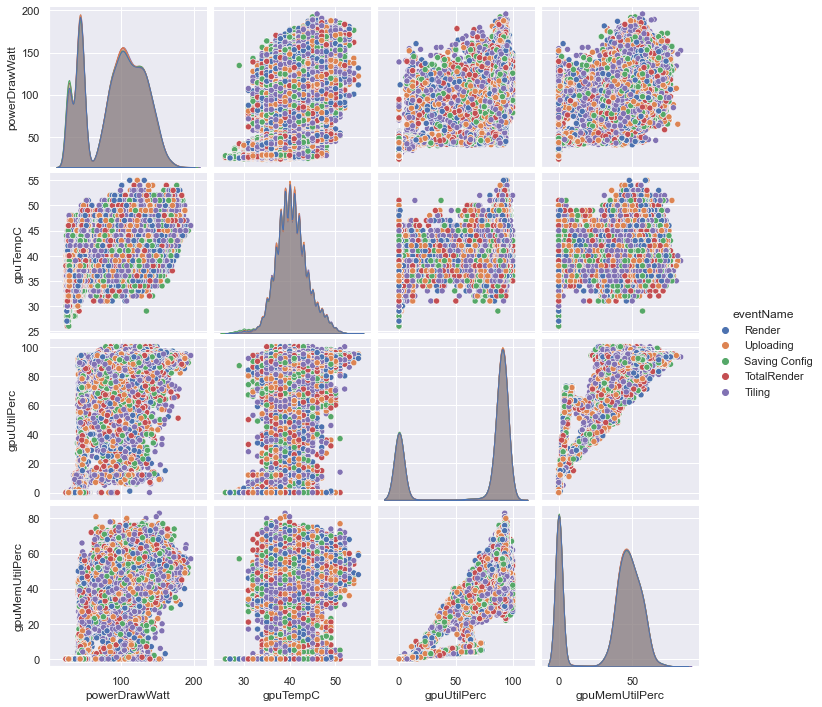

In [74]:
matrix_corr_2 = df_final[['powerDrawWatt','gpuTempC','gpuUtilPerc', 'gpuMemUtilPerc', 'eventName']]
sns.pairplot(matrix_corr_2, hue ='eventName')
plt.show()

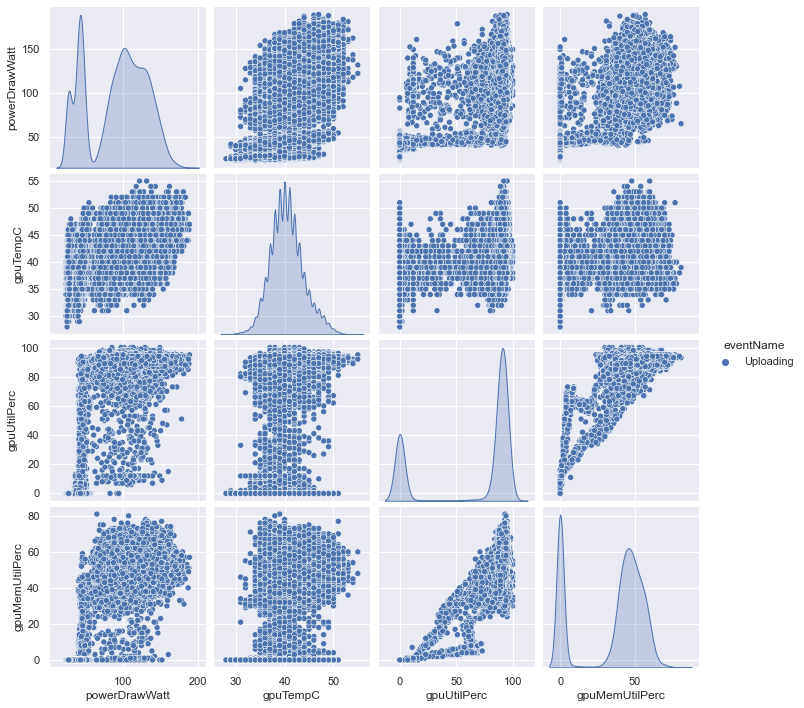

In [75]:
a = df_final.loc[df_final['eventName'] == 'Uploading']
a
t = a[['powerDrawWatt','gpuTempC','gpuUtilPerc', 'gpuMemUtilPerc', 'eventName']]
sns.pairplot(t, hue ='eventName')
plt.show()

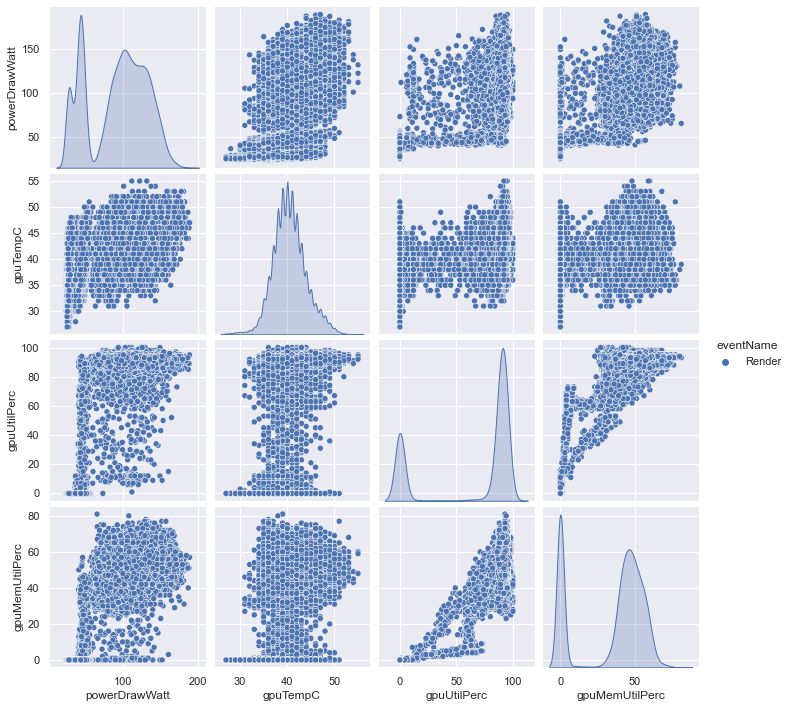

In [76]:
a = df_final.loc[df_final['eventName'] == 'Render']
a
t = a[['powerDrawWatt','gpuTempC','gpuUtilPerc', 'gpuMemUtilPerc', 'eventName']]
sns.pairplot(t, hue ='eventName')
plt.show()

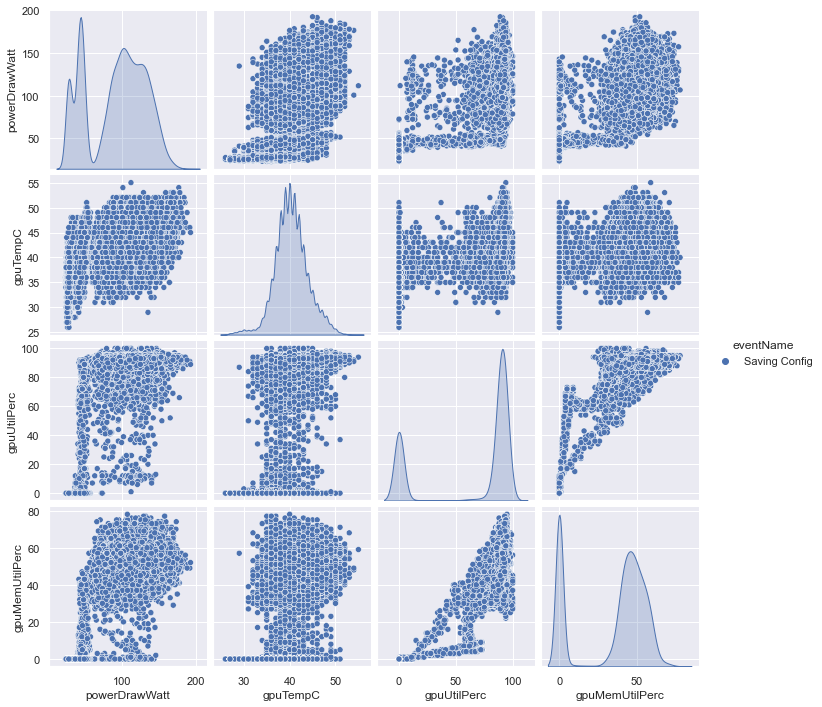

In [77]:
a = df_final.loc[df_final['eventName'] == 'Saving Config']
a
t = a[['powerDrawWatt','gpuTempC','gpuUtilPerc', 'gpuMemUtilPerc', 'eventName']]
sns.pairplot(t, hue ='eventName')
plt.show()

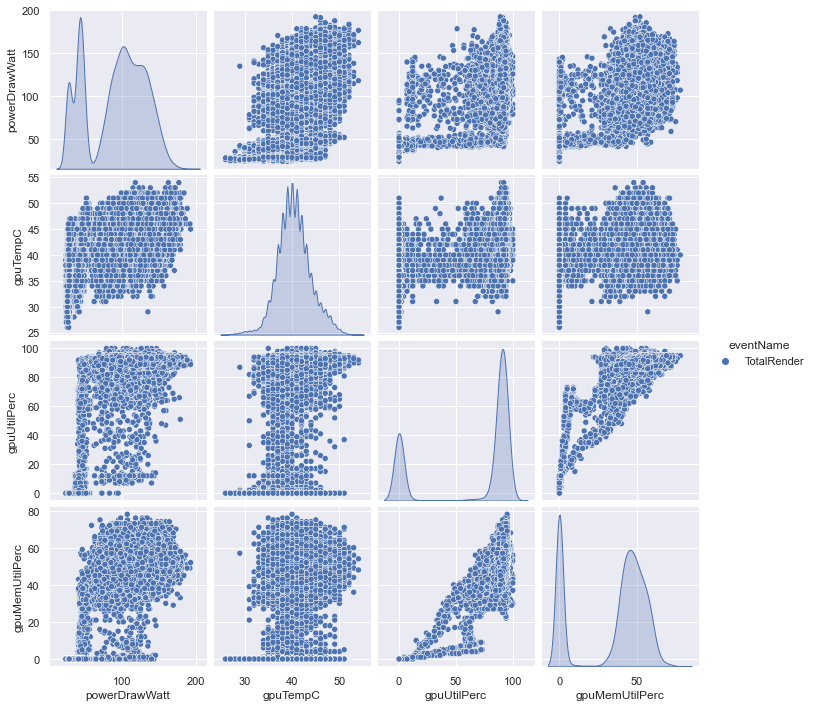

In [78]:
a = df_final.loc[df_final['eventName'] == 'TotalRender']
a
t = a[['powerDrawWatt','gpuTempC','gpuUtilPerc', 'gpuMemUtilPerc', 'eventName']]
sns.pairplot(t, hue ='eventName')
plt.show()

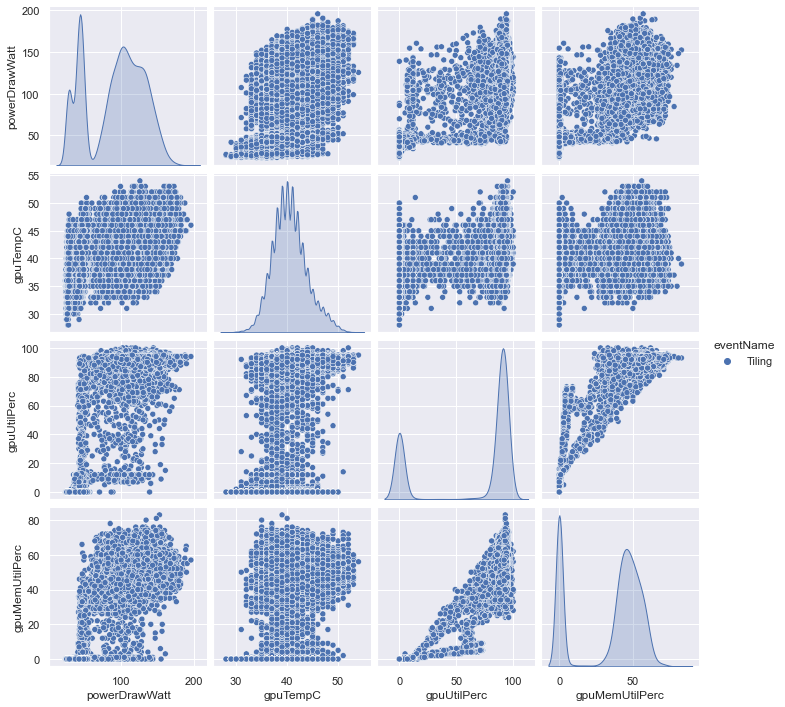

In [79]:
a = df_final.loc[df_final['eventName'] == 'Tiling']
t = a[['powerDrawWatt','gpuTempC','gpuUtilPerc', 'gpuMemUtilPerc', 'eventName']]
sns.pairplot(t, hue ='eventName')
plt.show()

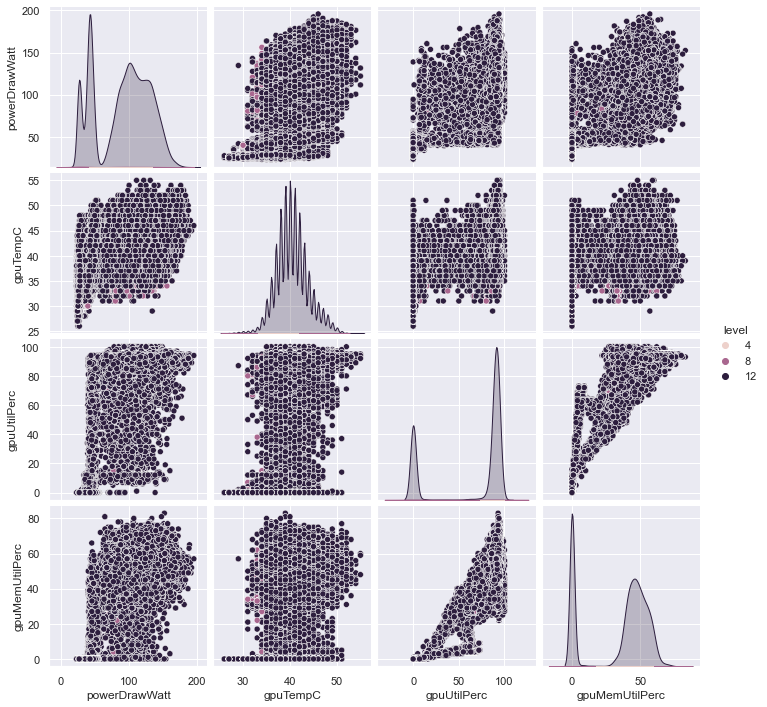

In [90]:
# a = df_final.loc[df_final['eventName'] != 'TotalRender']
# a
t = df_final[['powerDrawWatt','gpuTempC','gpuUtilPerc', 'gpuMemUtilPerc', 'level']]
sns.pairplot(t, hue ='level')
plt.show()

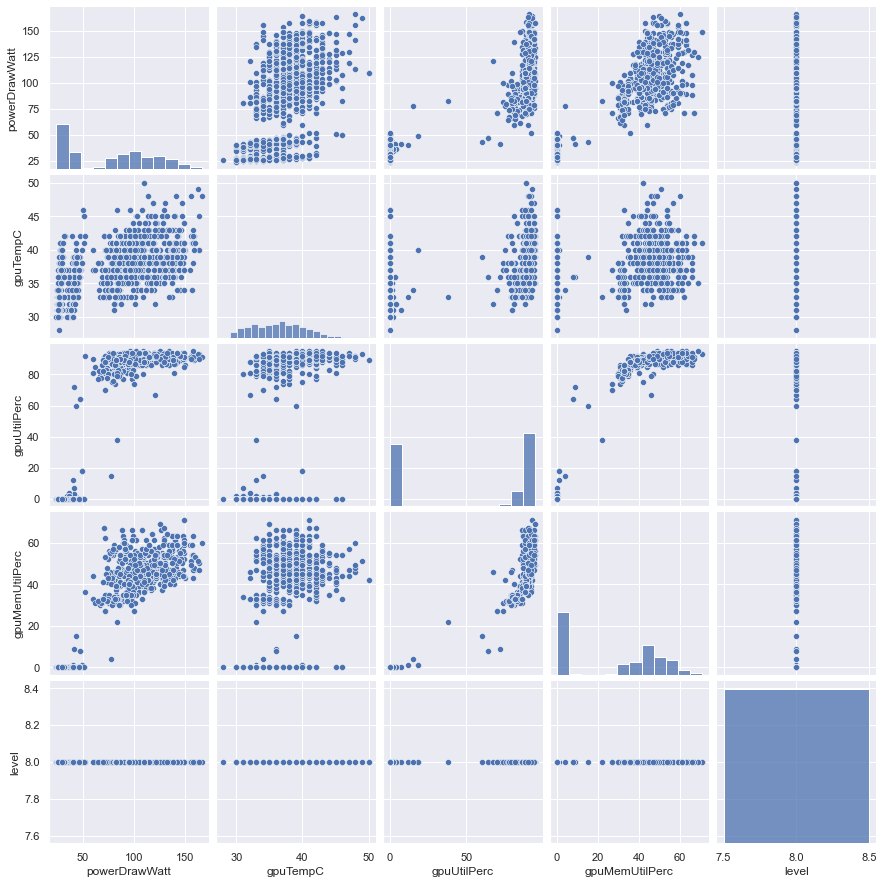

In [81]:
a = df_final.loc[df_final['level'] == 8]
t = a[['powerDrawWatt','gpuTempC','gpuUtilPerc', 'gpuMemUtilPerc', 'level']]
sns.pairplot(t)
plt.show()

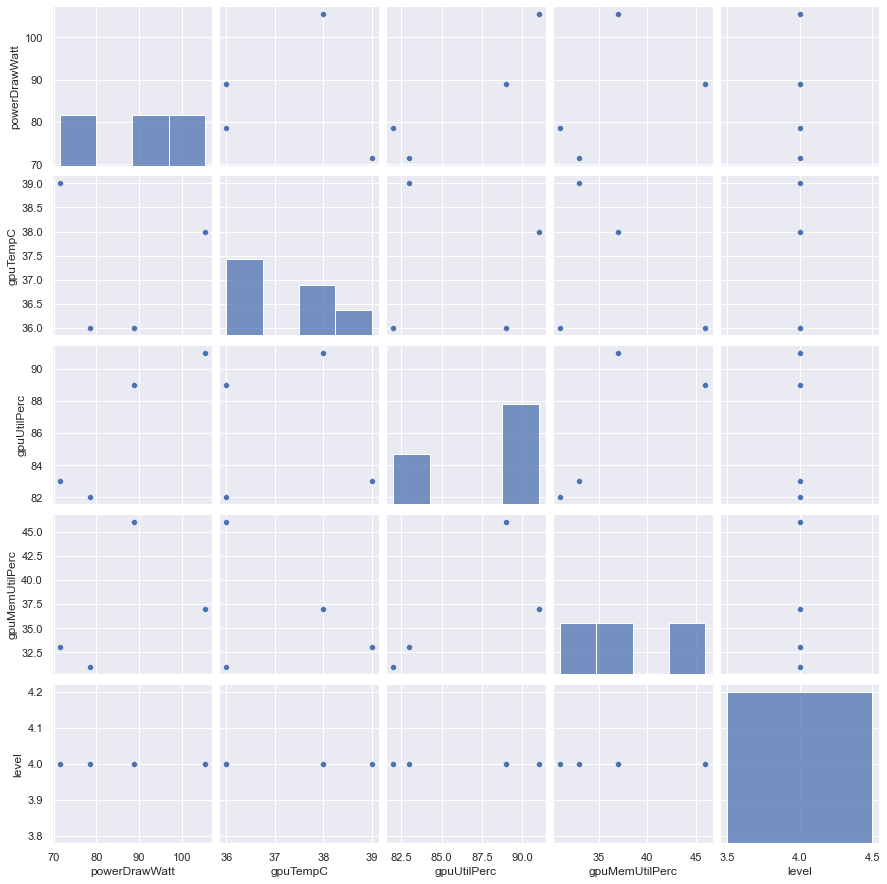

In [82]:
a = df_final.loc[df_final['level'] == 4]
# a
t = a[['powerDrawWatt','gpuTempC','gpuUtilPerc', 'gpuMemUtilPerc', 'level']]
sns.pairplot(t)
plt.show()